## Import DataSet

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib . pyplot as plt
sns.set_style('darkgrid')
flatu = ["#F9D423","#FD5D53","#FF847C", "#E84A5F","#98B838", "#FECEAB", "#2A363B","#A8A7A8","#474747"]
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
import cufflinks as cf
cf.go_offline()

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.index

RangeIndex(start=0, stop=303, step=1)

In [9]:
sum(data.isnull().sum())

0

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA 

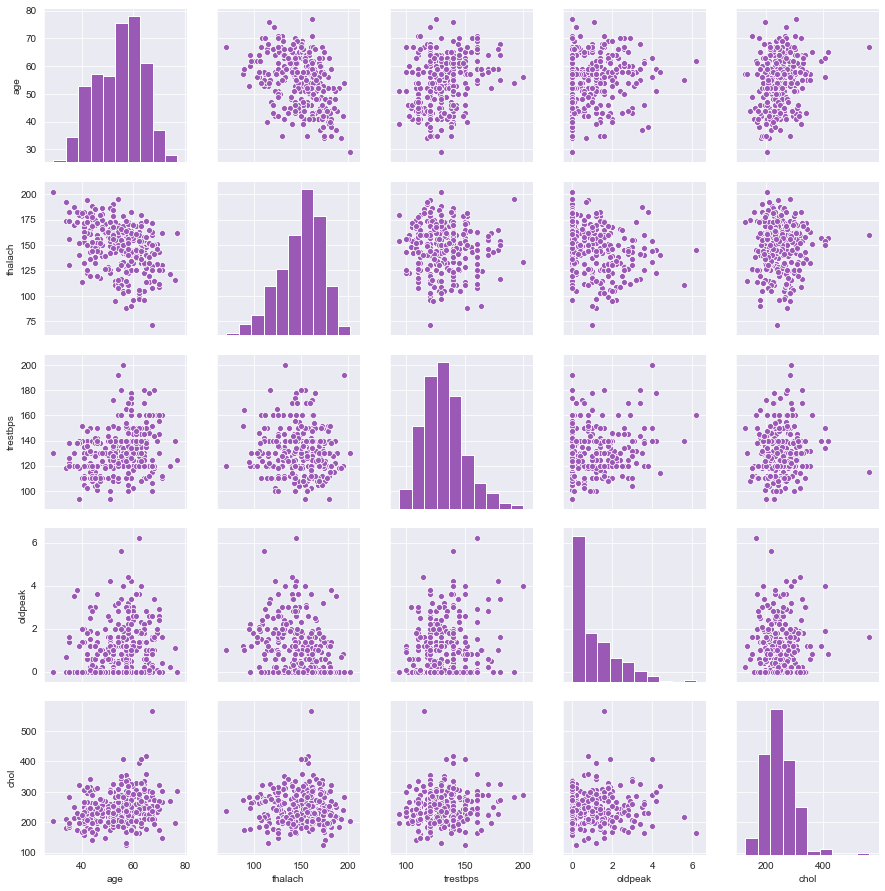

In [11]:
sns.pairplot(data[['age','thalach','trestbps','oldpeak','chol']])

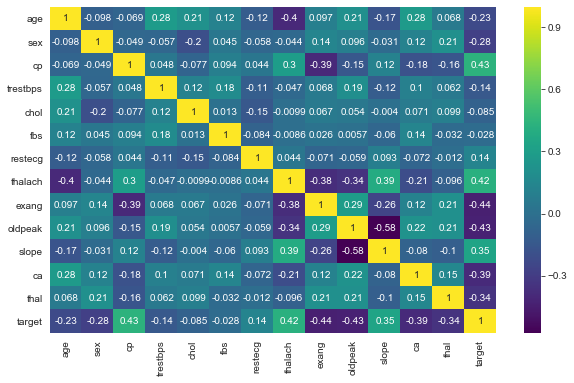

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

observations: from the above chol is poorly correlated to the target variable, which might not be very useful to our prediction.

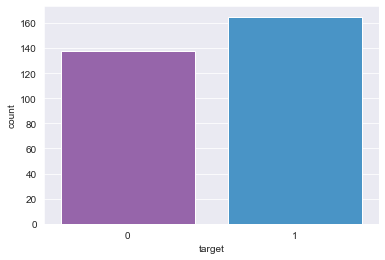

In [13]:
sns.countplot(data['target'])

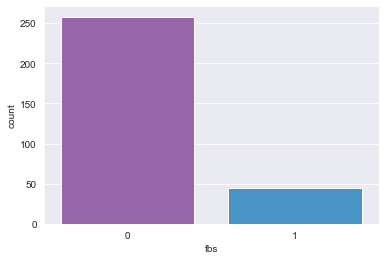

In [14]:
sns.countplot(data['fbs'])

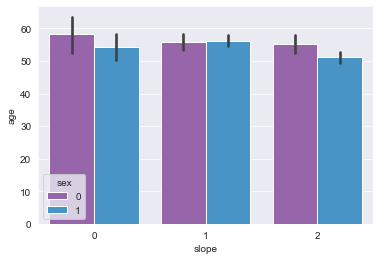

In [15]:
sns.barplot(x='slope',y='age',data=data,hue='sex')

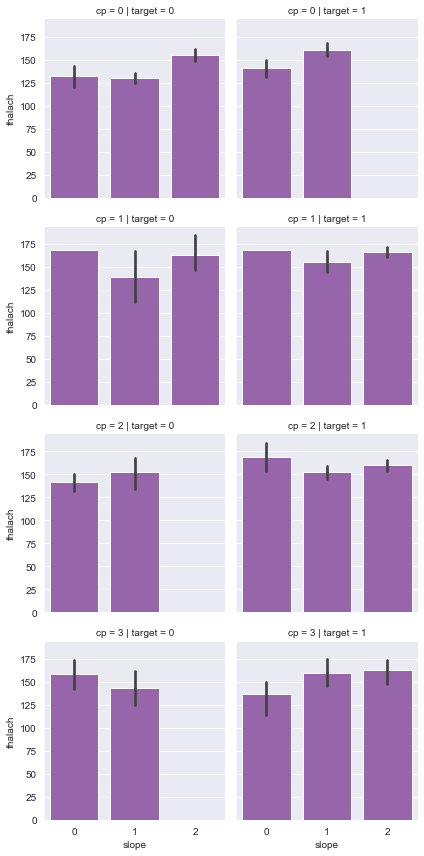

In [16]:
d = sns.FacetGrid(data=data,col='target',row='cp')
d.map(sns.barplot,'slope','thalach')

observations: when cp is 0 target is 1 and slop is 2 thalanch has no value same with cp 2 target 0 ,cp 3 and target 0 slope 2 thalanch has no value

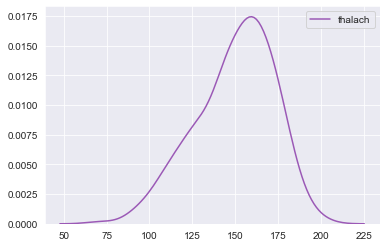

In [17]:
sns.kdeplot(data['thalach'])

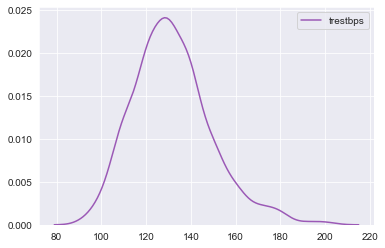

In [18]:
sns.kdeplot(data['trestbps'])

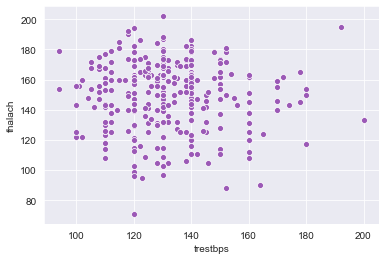

In [19]:
sns.scatterplot(data['trestbps'],data['thalach'])

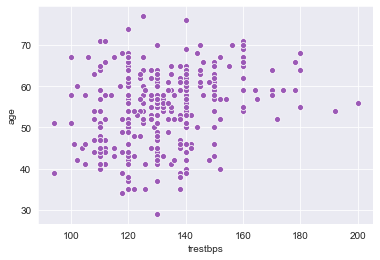

In [20]:
sns.scatterplot(data['trestbps'],data['age'])

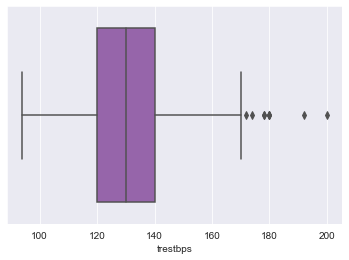

In [21]:
sns.boxplot(data['trestbps'])

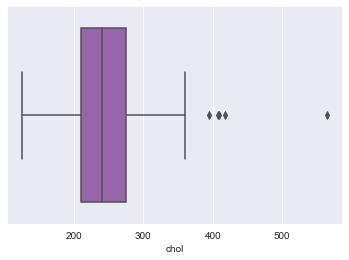

In [22]:
sns.boxplot(data['chol'])

In [23]:
IQR = data.trestbps.quantile(0.75) - data.trestbps.quantile(0.25)

Lower_fence = data.trestbps.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.trestbps.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(170.0, 90.0, 20.0)

In [24]:
data.query('trestbps >170 or trestbps < 90')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [25]:
IQR = data.chol.quantile(0.75) - data.chol.quantile(0.25)

Lower_fence = data.chol.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.chol.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(369.75, 115.75, 63.5)

In [26]:
data.query('chol >369.75 or chol < 115.75')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


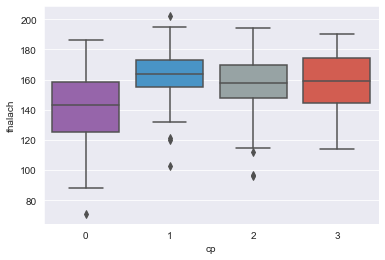

In [27]:
sns.boxplot(x=data['cp'],y = data['thalach'])

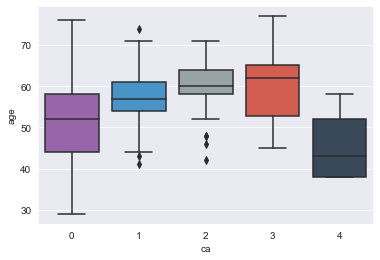

In [28]:
sns.boxplot(x=data['ca'],y=data['age'])

## Model Training

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data.drop('target',axis=1)
y = data['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size=0.2, random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [33]:
param = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}
logistic =LogisticRegression()

In [34]:
model = GridSearchCV(logistic,param,cv=10,refit=True,verbose=3)

In [35]:
model.fit(X_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.560, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.560, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.560, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.542, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.542, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................. C=0.001, penalty=l1, score=0.542, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=10.0, penalty=l1, score=0.750, total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .................. C=10.0, penalty=l1, score=0.750, total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .................. C=10.0, penalty=l1, score=0.833, total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .................. C=10.0, penalty=l1, score=0.875, total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .................. C=10.0, penalty=l1, score=0.708, total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .................. C=10.0, penalty=l1, score=0.870, total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV] .................. C=10.0, penalty=l2, score=0.720, total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished
C:\Users\matty\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



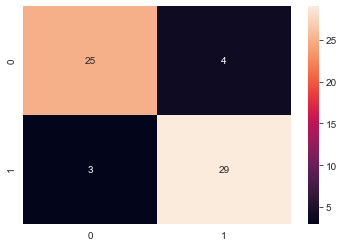

In [39]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')

## Evaluators

In [40]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
    n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """Plots the learning curve of a regression or classfication model using their defualt metrics accuracy or r2_score"""
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Accuracy")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1,
    color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
    label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
    label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [41]:
def Probability_fpr_tpr(estimator,X,y):
    """Returns the false postive rate and true postive rate"""
    probab = estimator.predict_proba(X)[:,1]
    [fpr,tpr,thr] = roc_curve(y, probab)
    return fpr,tpr,thr


def Plot_Roc_Curve(train_fpr,train_tpr,thr1,test_fpr,test_tpr,thr2):
    """Used to plot Roc Curve For Training and Test Set to Check Overfitting in model"""
    plt.figure(figsize=(11,6))
    plt.plot(train_fpr, train_tpr, color = 'coral', label = "Train ROC curve area: "+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, color = 'g', label = "Test ROC curve area: "+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (sensitivty)', fontsize=12)
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()
    
    idx = np.min(np.where(train_tpr>0.95))
    print("Train-Set:")
    print("Using a threshold of %.3f " % thr1[idx] + "guarantees a sensitivity of %.3f " % train_tpr[idx]+
    "and a specificity of %.3f" % (1-train_fpr[idx]) +
    ", i.e. a false positive rate of %.2f%%." % (np.array(train_fpr[idx])*100))
    print("Test-Set:")
    idx = np.min(np.where(test_tpr>0.95))
    print("Using a threshold of %.3f " % thr2[idx] + "guarantees a sensitivity of %.3f " % test_tpr[idx]+
    "and a specificity of %.3f" % (1-test_fpr[idx]) +
    ", i.e. a false positive rate of %.2f%%." % (np.array(test_fpr[idx])*100))
    
    print("\n")
    if abs(auc(train_fpr, train_tpr) - auc(test_fpr, test_tpr))*100 > 4.5:
        print("........................................This model is overfitting........................................")
    elif abs(auc(train_fpr, train_tpr) - auc(test_fpr, test_tpr))*100 <= 4.5:
        print("........................................this model is a good fit........................................")
    elif abs(auc(train_fpr, train_tpr) - auc(test_fpr, test_tpr))*100 < 0.1:
        print("........................................this model is Underfitting........................................")    
    else:
        print("unknown fit")

### Acuracy Learning Curve

In [42]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import learning_curve,ShuffleSplit

In [43]:
X = data.drop('target',axis=1).values
y = data['target'].values
title = "Learning Curve"
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=42)

<module 'matplotlib.pyplot' from 'C:\\Users\\matty\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

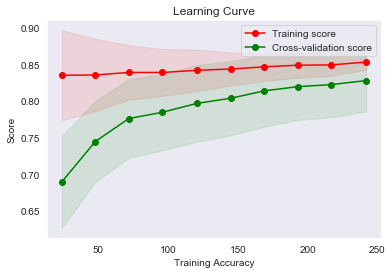

In [44]:
plot_learning_curve(model.best_estimator_,title,X,y,cv=cv)

### Roc Curve

In [45]:
train_fpr,train_tpr,thr1 = Probability_fpr_tpr(model,X_train,y_train)
test_fpr,test_tpr,thr2 = Probability_fpr_tpr(model,X_test,y_test)

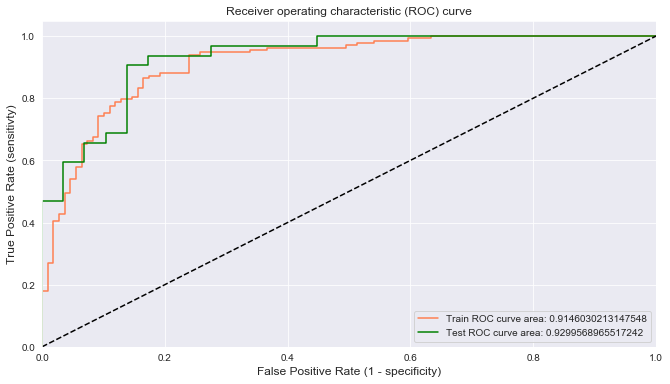

Train-Set:
Using a threshold of 0.396 guarantees a sensitivity of 0.955 and a specificity of 0.661, i.e. a false positive rate of 33.94%.
Test-Set:
Using a threshold of 0.151 guarantees a sensitivity of 0.969 and a specificity of 0.724, i.e. a false positive rate of 27.59%.


........................................this model is a good fit........................................


In [46]:
Plot_Roc_Curve(train_fpr,train_tpr,thr1,test_fpr,test_tpr,thr2)